# **MODULE 2 PROJECT: CONDITION OF THE FETUS DURING DELIVERY**


##Phase 1: Data loading and descriptive analysis.



In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Graphics
# ====================================================================
import matplotlib.pyplot as plt

# Processing and Modeling
# ====================================================================
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Configuration Warning 
# =====================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data file, for this we create a new folder, data, and upload the .csv file. We check that the loading has been done correctly.
file = '/content/data/ASI_casoPractico.csv'
data = pd.read_csv(file,sep = ';')
data.head();

**Description of Variables**


* ID: Observation ID
* b: Start time
* e: End time
* LBE: Baseline fetal heart rate (beats per minute) * AC: Number of accelerations per second 
* BHR: Baseline fetal heart rate (beats per minute)
* AC: Number of accelerations per second * FM: Number of fetal movements
* FM: Number of fetal movements per second * UC: Number of uterine contractions
* UC: Number of uterine contractions per second * ASTV: Percentage of fetal contractions per second
* ASTV: Percentage of time with abnormal short-term variability.
* MSTV: Mean value of short-term variability.
* ALTV: Percentage of time with abnormal long-term variability.
* MLTV: Mean value of long-term variability.
* DL: Number of slight decelerations per second * DS: Number of slowdowns per second
* DS: Number of severe decelerations per second * DP: Number of severe decelerations per second
* DP: Number of prolonged decelerations per second * DR: Number of prolonged decelerations per second * DR: Number of prolonged decelerations per second
* DR: Number of repetitive decelerations per second * DR: Number of repetitive decelerations per second
* Width: Width of the FHR histogram * Min: Minimal (low)
* Min: Minimum (low frequency) of the FHR histogram * Max: Maximum (high frequency) of the FHR histogram * Min: Minimum (low frequency) of the FHR histogram
* Maximum: Maximum (high frequency) of the FHR histogram.
* Nmax: Number of peaks of the histogram
* Nzeros: Number of histogram zeros * Mode: Histogram mode
* Mode: Mode of the histogram
* Mean: Histogram mean
* Median: Median of the histogram * Variance: Variance of the histogram
* Variance: Variance of the histogram.
* Trend: Histogram trend * Target: Histogram status class code
* Target: Fetal status class code * Target: Fetal status class code



In [ ]:
# Remove unneeded columns
data = data.drop(['ID','b','e','DR'], axis = 1)


In [ ]:
# Consult general statistical data: number of elements, mean, deviation, minimum value, percentiles.
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Query the type of variable
data.dtypes

LBE           int64
AC            int64
FM            int64
UC            int64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
DL            int64
DS            int64
DP            int64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
Target        int64
dtype: object

### VISUAL ANALYSIS OF THE DATASET

In [ ]:
# Import display lobrerias
import matplotlib.pyplot as plp
import seaborn as sns


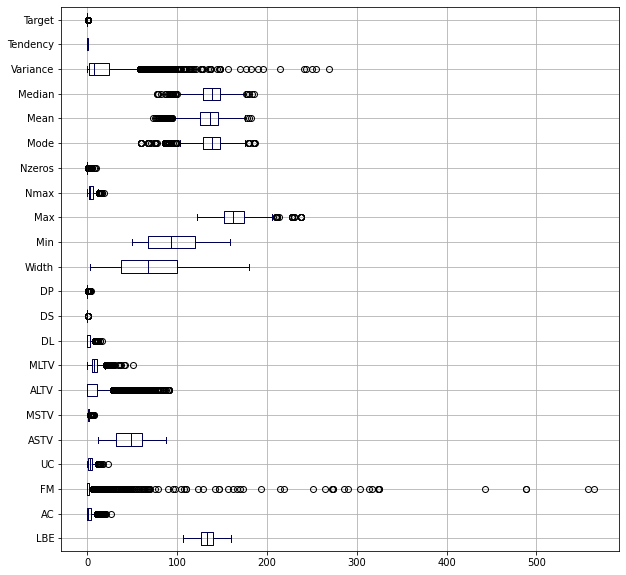

In [ ]:
# Analyze the Boxplot distribution for each variable
data_box_plot = data.boxplot(vert=False, color = "#000054", figsize = (10,10))

The Boxplot of this dataset shows the existing dispersion in the variable FM (Number of fetal movements per second).

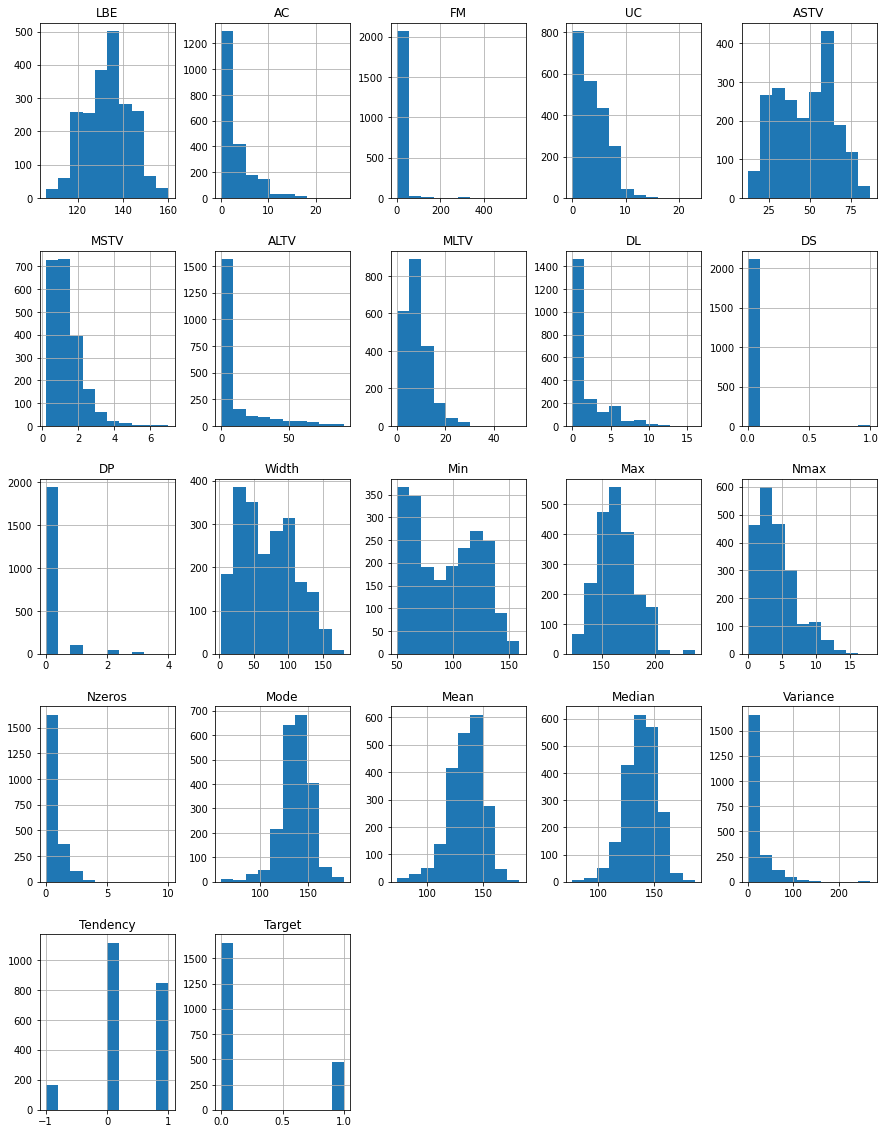

In [ ]:
# Histogram display
data.hist(figsize=(15,20))
plp.show()

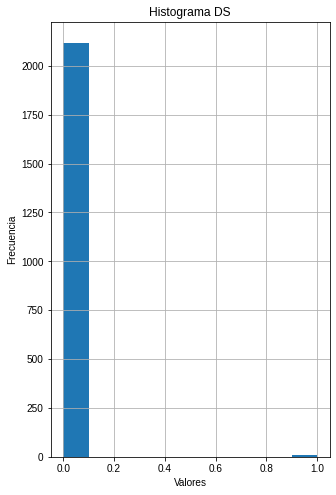

In [ ]:
# Histograma DS
fig, ax = plt.subplots(1,1,figsize=(5,8))
plt.style.use('seaborn')
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma DS")
data['DS'].hist(ax=ax);

In **DS** the isolated bar at the 1.0 end could be identifying outliers, but in this case it is because the variable only takes values 0 and 1.

We should investigate the cause of such outliers (measurement errors, transcription errors...), and even consider eliminating data values that are associated with abnormal (not target states) and/or unique events.



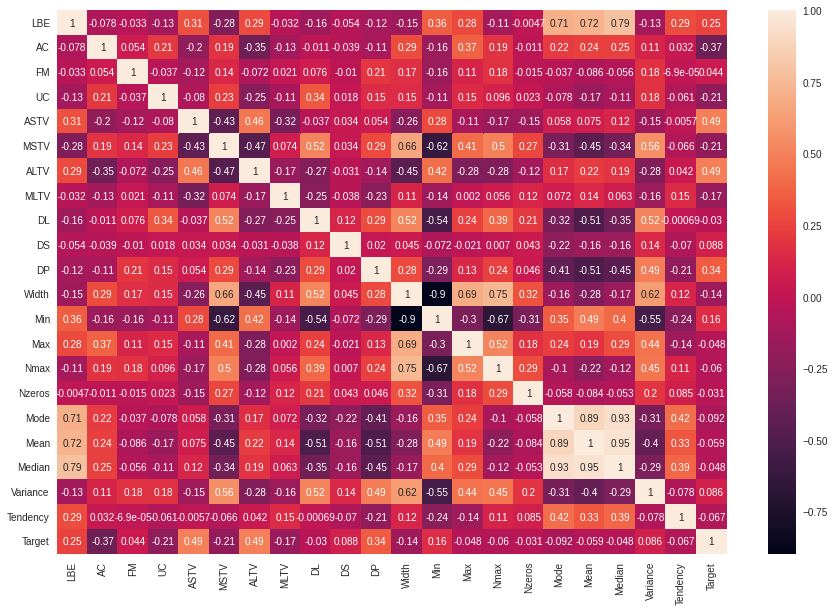

In [ ]:
plp.figure(figsize=(15, 10))
correlacion = data.corr()
sns.heatmap(correlacion, annot=True);

There is a remarkable correlation between the variables Mode, Mean, Median and LBE (beats per minute).

The pairs with the highest correlation are both increasing and decreasing:

* Mean Median 0.948251 (positive or increasing relationship).
* Mode Median 0.933399 (positive or increasing relationship)
* Width Min  -0.898519 (negative or decreasing relationship)
* Mean Mode   0.893412 (positive or increasing relationship)

In [ ]:
# Order the correlation of the variables with the Target
corr=data.corr()["Target"].sort_values(ascending=False)

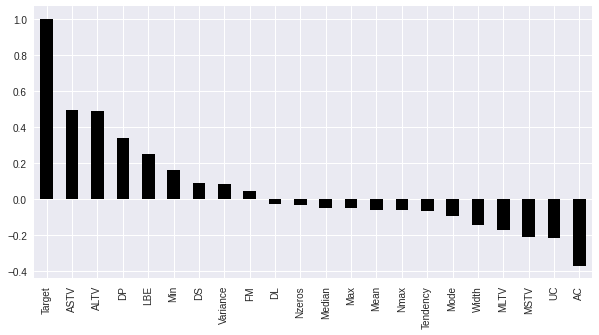

In [ ]:
# Visualize the relationship of the variables with the target.
plp.figure(figsize=(10,5))
corr.plot(kind='bar',color='black');

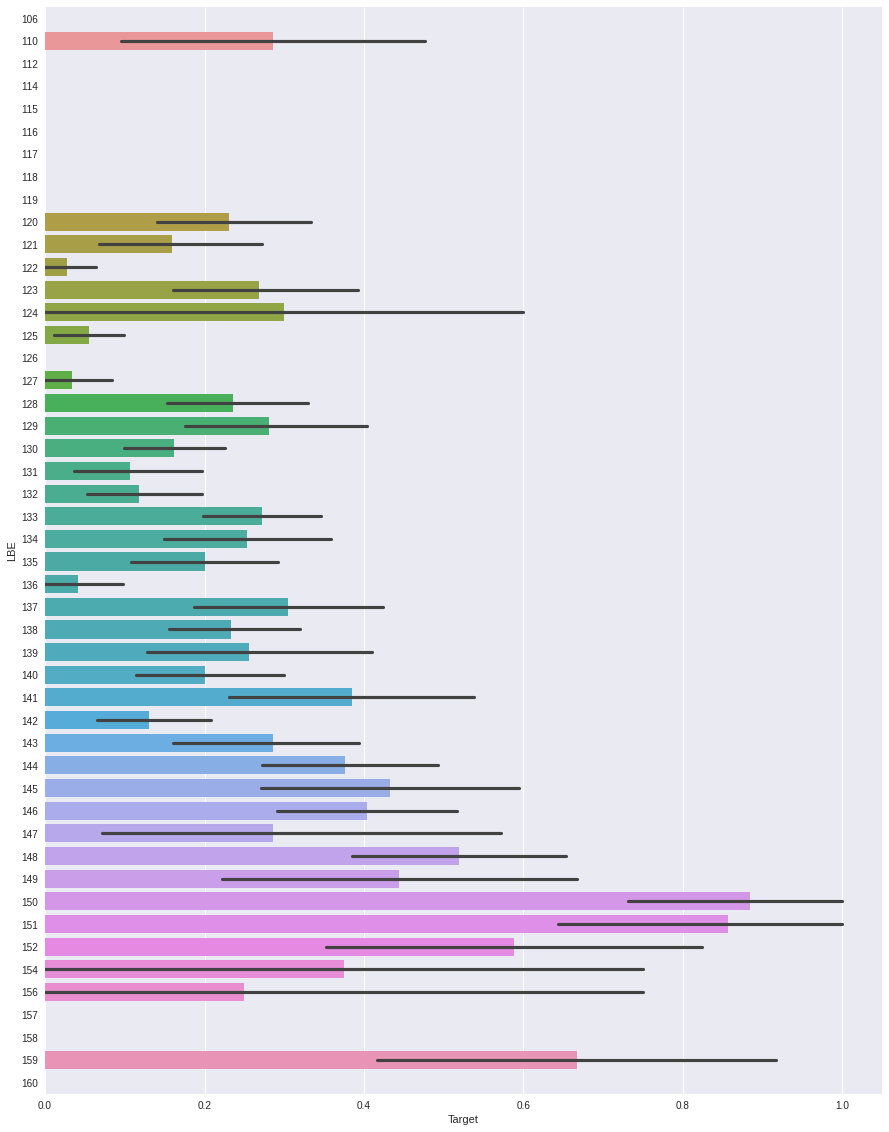

In [ ]:
# Display between LBE variable and Target
plp.figure(figsize=(15,20))
sns.barplot(data=data,y='LBE',x='Target',orient="h3");

0    1655
1     471
Name: Target, dtype: int64


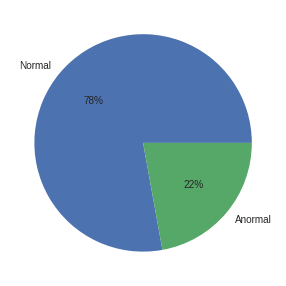

In [ ]:
# TARGET FREQUENCY DISTRIBUTION
a, b = data['Target'].value_counts()
plt.figure(figsize= (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal","Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

22% of the births correspond to babies whose condition is abnormal, and 78% to births of children who did not have any type of complication.

##Phase 2: Sampling. Training and test set

In [ ]:
# Import the necessary libraries 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


# Warnings configuration
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#We check that our dataset has already eliminated those variables "ID", "b", "e", "DR", that we do not consider transcendent.
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,0,64,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,0,130,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,0,130,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,0,117,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,0,117,53,170,9,0,137,136,138,11,1,0


In [ ]:
# Sampling
# Training and test set
from sklearn.model_selection import train_test_split
X_hip1 = data.loc[:, data.columns !='Target']
y_hip1 = data.loc[:, data.columns =='Target']

#X_hip1 = data.drop('Target', axis=1)
#y_hip1 = data['Target']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_hip1,y_hip1,train_size=0.8,test_size= 0.2, random_state=0)


## Phase 3: Adjustment of the Naive Bayes algorithm.

### 3.1 Method 1: Using a Gaussian Algorithm without categorizing the variables

In [ ]:
# Since most of the variables are continuous, we will choose the Gaussian variable.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

modelNB = gnb.fit(X_train1, y_train1.values.ravel())
y_pred_train1 = modelNB.predict_proba(X_train1) 
y_pred_test1 = modelNB.predict_proba(X_test1)

## Phase 4: Tuning the Support Vector Machine SVM algorithm



In [ ]:
# Sampling
# Training and test set
from sklearn.model_selection import train_test_split
X_hip4 = data.loc[:, data.columns !='Target']
y_hip4 = data.loc[:, data.columns =='Target']


X_train4, X_test4, y_train4, y_test4 = train_test_split(X_hip4,y_hip4,train_size=0.8,test_size= 0.2, random_state=0)


The default values for the SVM algorithm are those listed at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC. Among them:

* Regularization parameter or C=1.
* Kernel = 'rbf' i.e. the Gaussian kernel.
* Degree only applies when the kernel is polynomial indicating the degree of the polynomial, so it is not included.

We will add the parameter probability = True, which will indicate the probability for each class and will be useful for the preparation of the ROC curve.

Once the model has been fitted, we will proceed to calculate the goodness of fit. 


In [ ]:
# Linear SVM with linal kernel.
svmLineal = svm.SVC(C = 1  # Regularization parameter
                    ,kernel='linear' 
                    ,probability = True) #   probabiity for each class and will be useful for constructing the ROC curve.

# Model adjustment
svmLineal.fit(X_train4, y_train4)

# Validation of the training and test sets used to calculate the goodness of fit of the model.
y_proba_train_svm = svmLineal.predict_proba(X_train4)
y_proba_test_svm = svmLineal.predict_proba(X_test4)


### Phase 5: Validation of the chosen algorithm based on the ROC curve, the area under the curve, the confusion matrix and the accuracy. Evaluate if there is overfitting.

#### 5.1 NAIVE BAYES

In [ ]:
# Training
fpr_train_NB, tpr_train_NB, _ = roc_curve(y_train1, y_pred_train1[:, 1])
roc_auc_train_NB = auc(fpr_train_NB, tpr_train_NB)

# Test
fpr_test_NB, tpr_test_NB, _ = roc_curve(y_test1, y_pred_test1[:, 1])
roc_auc_test_NB = auc(fpr_test_NB, tpr_test_NB)

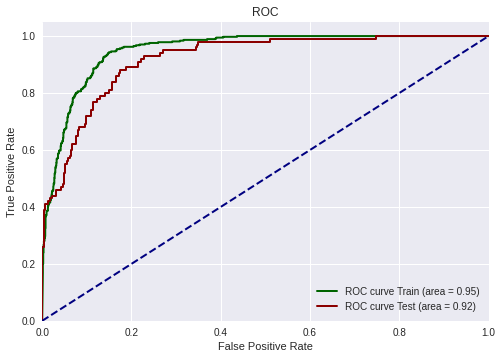

In [ ]:
# ROC curve and AUC
plt.figure()
lw = 2

plt.plot(fpr_train_NB,tpr_train_NB,color="darkgreen",lw=lw,label="ROC curve Train (area = %0.2f)" % roc_auc_train_NB,)
plt.plot(fpr_test_NB,tpr_test_NB,color="darkred",lw=lw,label="ROC curve Test (area = %0.2f)" % roc_auc_test_NB,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

There is some overfitting. This model gives us a class separation with a training accuracy of 95% and a test accuracy of 92%. The model can be improved. 

#### 5.4 SVM

In [ ]:
#we will obtain the probabilities of class 0 and 1.
print(y_proba_train_svm)

[[9.99990235e-01 9.76479373e-06]
 [9.99798136e-01 2.01864476e-04]
 [9.97324869e-01 2.67513063e-03]
 ...
 [7.96170096e-01 2.03829904e-01]
 [9.99635464e-01 3.64535686e-04]
 [9.60132935e-01 3.98670649e-02]]


We obtain a matrix that has two values: one column would be the probability of class 0 and the other the probability of class 1. 

With this matrix we are going to calculate the ROC curve.

In [ ]:
# Calculate the ROC curve (with the false positive rate and the true positive rate)
# training
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train4, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test4, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

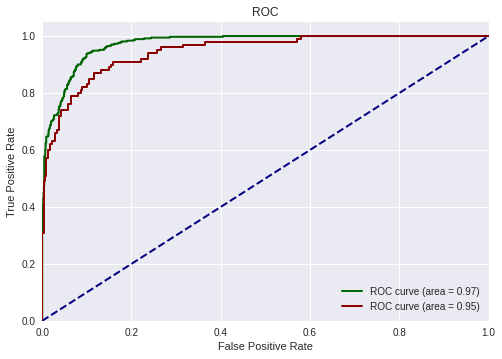

In [ ]:
# Define and plot the ROC curve and AUC.
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Here we have a minimal overfitting although the accuracy is better. This model gives a class separation with a training accuracy of 97% and a test accuracy of 95%. In the next section we will try to improve it by adjusting the hyperparameters. 

## Additional phase: Search for the best combination of hyperparameters in the SVM algorithm using the Grid Search function of Scikit Learn. 

### GRID SEARCH

In [ ]:
# Funcion de malla para que calcule diferentes modelos a la vez de manera automática. 

from sklearn.model_selection import GridSearchCV

# Define the Param Grid function:
param_grid = [
              {"kernel":["rbf"], "gamma": [1e-3, 1e-4], "C": [0.1,1,10]}, # 6 Modelos con Kernel Gaussiano
              {"kernel":["linear"],"C": [0.1,1,10]},                      # 3 Modelos con Kerlen Lineal
              {"kernel":["poly"], "C": [0.1,1,10], "degree" : [2,3]},     # 6 Modelos con Kernel Polinomico
              {"kernel":["rbf"], "gamma": [2e-3, 2e-4], "C": [0.5,3,8]}, # 6 Modelos con Kernel Gaussiano
              {"kernel":["linear"],"C": [0.5,3,8]},                      # 3 Modelos con Kerlen Lineal
              {"kernel":["poly"], "C": [0.5,3,8], "degree" : [2,3]},     # 6 Modelos con Kernel Polinomico
]

grid = GridSearchCV(
    estimator  = SVC(),
    param_grid = param_grid, 
    scoring    = 'roc_auc', 
    n_jobs     = -1, # -1 : 
    cv         = 3,
    verbose    = 0,
    return_train_score = True
  )
# The result is assigned to _ so that it is not printed on the screen.
grid.fit(X = X_train4, y = y_train4)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3],
                          'kernel': ['poly']},
                         {'C': [0.5, 3, 8], 'gamma': [0.002, 0.0002],
                          'kernel': ['rbf']},
                         {'C': [0.5, 3, 8], 'kernel': ['linear']},
                         {'C': [0.5, 3, 8], 'degree': [2, 3],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='roc_auc')

In [ ]:
# Grid Results
# ============================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex ='(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
21,0.5,NaN,linear,NaN,0.969296,0.008695,0.973170,0.004127
5,10,0.0001,rbf,NaN,0.969282,0.006791,0.982325,0.002145
7,1,NaN,linear,NaN,0.969241,0.008502,0.973156,0.004201
20,8,0.0002,rbf,NaN,0.969185,0.007468,0.987474,0.002192
22,3,NaN,linear,NaN,0.968853,0.008401,0.973234,0.004102
8,10,NaN,linear,NaN,0.968632,0.008654,0.973263,0.003964
6,0.1,NaN,linear,NaN,0.968497,0.008547,0.971487,0.004427
23,8,NaN,linear,NaN,0.968272,0.008237,0.973026,0.004193
18,3,0.0002,rbf,NaN,0.967522,0.006498,0.982110,0.002345
4,10,0.001,rbf,NaN,0.963220,0.009067,0.998475,0.001055


The best result gives us an AUC in Test of 0.96 and an AUC in train of 0.97, obtaining a small overfit. 
It has a Linear Kernel for a value of C=0.5.